# Human Activity Recognition (Mini Project)
## Questions/Tasks
1. Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? **[1 marks]**

In [2]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from latex import latexify, format_axes
import numpy as np
import tsfel

In [10]:
# Training Data from Combined Folder. Make sure this file - 'data_analysis.ipynb' - is stored in the same directory as 'Train' and 'Test' subdirectories of 'Combined' folder.
data_laying, data_sitting, data_standing, data_walking, data_walking_downstairs, data_walking_upstairs = [], [], [], [], [], []
for i in range(1, 31):
    if i in [2, 4, 9, 10, 12, 13, 18, 20, 24]:
        continue
    data_laying.append(pd.read_csv(f'./Train/LAYING/Subject_{str(i)}.csv'))
    data_sitting.append(pd.read_csv(f'./Train/SITTING/Subject_{str(i)}.csv'))
    data_standing.append(pd.read_csv(f'./Train/STANDING/Subject_{str(i)}.csv'))
    data_walking.append(pd.read_csv(f'./Train/WALKING/Subject_{str(i)}.csv'))
    data_walking_downstairs.append(pd.read_csv(f'./Train/WALKING_DOWNSTAIRS/Subject_{str(i)}.csv'))
    data_walking_upstairs.append(pd.read_csv(f'./Train/WALKING_UPSTAIRS/Subject_{str(i)}.csv'))

list_of_activities = [data_laying, data_sitting, data_standing, data_walking, data_walking_downstairs, data_walking_upstairs]

In [4]:
# Analyzing the data
latexify()
fig,ax = plt.subplots(21, 6, figsize = (200, 250))
fig.suptitle('Time Series of Activities performed by all the Subjects', size = 150)

for i in range(21):
    for j in range(6):
        for k in range(3):
            ax[i, j].plot(list_of_activities[j][i].index, list_of_activities[j][i].iloc[:, k], c = ["r", "g", "b"][k])
            ax[i, j].set_title(f"Activity: {['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'][j]}, Subject: {[1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30][i]}", size = 75)
format_axes(plt.gca())

plt.savefig("Data.png")
plt.show()

/var/folders/rn/v0v0mhyx1lq27mkj7vl7v5c80000gn/T/ipykernel_13247/1553666375.py:14: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  plt.show()


From the above plots, one can easily differentiate between Static Activities (like Laying, Sitting, Standing) and Dynamic Activities (Walking,Walking Downstairs, Walking Upstairs) as the Dynamic Activities are more volatile as compared to the Static Activities.

Among subjects belonging to the same class, there is a certain degree of similarity in the trends of time series data. 

The model may be capable of classifying the activites into Static and Dynamic, though further classification may depend on many factors like model implemented, hyperparameters, feature matrix, etc.

### Calculating the Total Acceleration $(acc_x^2 + acc_y^2 + acc_z^2)$

In [11]:
for i in list_of_activities:
    for dF in i:
        dF["acc_tot"] = dF["accx"]**2 + dF["accy"]**2 + dF["accz"]**2
        

In [7]:
latexify()
fig,ax = plt.subplots(21, 6, figsize = (200, 250))
fig.suptitle('Time Series of Activities performed by all the Subjects', size = 150)

for i in range(21):
    for j in range(6):
        ax[i, j].plot(list_of_activities[j][i].index, list_of_activities[j][i].iloc[:, 3])
        ax[i, j].set_title(f"Activity: {['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'][j]}, Subject: {[1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30][i]}", size = 75)
format_axes(plt.gca())

plt.savefig("Data_Acc.png")
plt.show()

/var/folders/rn/v0v0mhyx1lq27mkj7vl7v5c80000gn/T/ipykernel_13247/680217886.py:12: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [12]:
lit = [list_of_activities[i][j].shape[0] for i in range(6) for j in range(21)]
minDim = np.min(lit)
minDim

2304

In [13]:
arr = np.array([np.array(list_of_activities[i][j]["acc_tot"][:minDim]) for i in range(6) for j in range(21)])
arr.shape

(126, 2304)

In [14]:
arr

array([[0.99124843, 0.9949222 , 0.9935185 , ..., 0.97536731, 0.97835299,
        0.98228458],
       [1.00383673, 1.0092382 , 0.9957057 , ..., 0.99155208, 0.98803001,
        0.99371836],
       [1.06056071, 1.07720409, 1.02464828, ..., 1.00349207, 1.00301498,
        1.01262776],
       ...,
       [1.50888011, 1.3913049 , 1.1032767 , ..., 0.82700396, 0.80280752,
        0.89477129],
       [0.38107659, 0.35945527, 0.3704989 , ..., 1.38419677, 1.23282649,
        1.15043528],
       [0.9136402 , 0.81510405, 0.8289459 , ..., 0.97718379, 1.00146722,
        1.05315189]])

In [15]:
df = pd.DataFrame(arr)
df["ACTIVITY_LABEL"] = [[['LAYING'] * 21, ['SITTING'] * 21, ['STANDING'] * 21, ['WALKING'] * 21, ['WALKING_DOWNSTAIRS'] * 21, ['WALKING_UPSTAIRS'] *21][i][j] for i in range(6) for j in range(21)]
df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,ACTIVITY_LABEL
0,0.991248,0.994922,0.993519,0.986527,0.978529,0.980399,0.984054,0.990949,0.990788,0.984551,...,0.980034,0.982327,0.985773,0.989382,0.983331,0.976176,0.975367,0.978353,0.982285,LAYING
1,1.003837,1.009238,0.995706,0.985511,0.977421,0.960878,0.970270,0.997076,1.003079,0.991231,...,0.988445,0.987145,0.986402,0.988238,0.987874,0.991267,0.991552,0.988030,0.993718,LAYING
2,1.060561,1.077204,1.024648,1.002516,1.015462,1.021485,1.008852,0.996321,0.999318,0.983540,...,1.014099,1.012214,1.005905,1.004093,1.005089,1.004381,1.003492,1.003015,1.012628,LAYING
3,0.895402,0.878271,0.919944,1.026527,1.103843,1.082973,1.070531,1.024207,0.963105,0.951468,...,1.016785,1.023746,1.031410,1.016616,0.998654,0.998348,0.998963,1.005306,1.013099,LAYING
4,0.998226,0.983046,0.967563,0.965237,0.985538,1.009446,1.009378,0.993425,1.004714,1.000145,...,1.011945,1.013312,1.006369,1.000343,1.005399,1.010773,1.007452,1.005268,1.005718,LAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.786588,0.711154,0.627173,0.553572,0.476561,0.501296,0.485750,0.439340,0.525397,0.586002,...,0.243746,0.251803,0.320887,0.470176,0.755549,1.169992,1.518717,1.564819,1.420197,WALKING_UPSTAIRS
122,1.565060,1.453867,1.299029,1.095646,0.902798,0.765976,0.724398,0.751464,0.713987,0.668346,...,1.312839,1.117056,0.875312,0.792618,0.841927,0.781781,0.772212,0.758973,0.688613,WALKING_UPSTAIRS
123,1.508880,1.391305,1.103277,0.937370,0.856864,0.826104,0.784588,0.669186,0.512510,0.403738,...,1.049527,1.402925,1.549554,1.373139,1.316382,1.112625,0.827004,0.802808,0.894771,WALKING_UPSTAIRS
124,0.381077,0.359455,0.370499,0.447981,0.529655,0.625140,0.808118,0.909753,1.129914,1.508670,...,2.439140,2.864446,2.103250,1.112065,0.828607,1.099768,1.384197,1.232826,1.150435,WALKING_UPSTAIRS


Checking the minimum sample length of the Test set

In [19]:
# Testing Data from Combined Folder. Make sure this file - 'data_analysis.ipynb' - is stored in the same directory as 'Train' and 'Test' subdirectories of 'Combined' folder.
data_laying_test, data_sitting_test, data_standing_test, data_walking_test, data_walking_downstairs_test, data_walking_upstairs_test = [], [], [], [], [], []
for i in range(1, 31):
    if i in [2, 4, 9, 10, 12, 13, 18, 20, 24]:
        data_laying_test.append(pd.read_csv(f'./Test/LAYING/Subject_{str(i)}.csv'))
        data_sitting_test.append(pd.read_csv(f'./Test/SITTING/Subject_{str(i)}.csv'))
        data_standing_test.append(pd.read_csv(f'./Test/STANDING/Subject_{str(i)}.csv'))
        data_walking_test.append(pd.read_csv(f'./Test/WALKING/Subject_{str(i)}.csv'))
        data_walking_downstairs_test.append(pd.read_csv(f'./Test/WALKING_DOWNSTAIRS/Subject_{str(i)}.csv'))
        data_walking_upstairs_test.append(pd.read_csv(f'./Test/WALKING_UPSTAIRS/Subject_{str(i)}.csv'))

list_of_activities_test = [data_laying_test, data_sitting_test, data_standing_test, data_walking_test, data_walking_downstairs_test, data_walking_upstairs_test]

In [20]:
for i in list_of_activities_test:
    for dF in i:
        dF["acc_tot"] = dF["accx"]**2 + dF["accy"]**2 + dF["accz"]**2
        

In [21]:
lit_test = [list_of_activities_test[i][j].shape[0] for i in range(6) for j in range(9)]
minDim_test = np.min(lit_test)
minDim_test

2432

In [22]:
arr_test = np.array([np.array(list_of_activities_test[i][j]["acc_tot"][:min(minDim_test, minDim)]) for i in range(6) for j in range(9)])
arr_test.shape

(54, 2304)

In [23]:
df_test = pd.DataFrame(arr_test)
df_test["ACTIVITY_LABEL"] = [[['LAYING'] * 9, ['SITTING'] *9, ['STANDING'] *9, ['WALKING'] *9, ['WALKING_DOWNSTAIRS'] *9, ['WALKING_UPSTAIRS']*9][i][j] for i in range(6) for j in range(9)]
df_test

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,ACTIVITY_LABEL
0,1.019674,1.003766,1.000309,1.008703,1.010195,1.003583,0.997843,0.988077,0.983842,1.004984,...,0.983209,0.988185,0.990636,0.986513,0.984427,0.988101,0.991497,0.988850,0.983411,LAYING
1,1.004123,0.956493,0.964615,1.006322,1.091522,1.185417,1.129239,0.975562,0.858983,0.830247,...,1.002235,1.004127,1.003171,1.000603,1.002386,1.003971,1.005655,0.998266,0.983949,LAYING
2,0.991090,0.987183,1.033963,1.058950,1.013131,1.004811,1.019786,1.022620,1.001016,0.961156,...,0.990823,0.996121,0.994797,1.005398,1.021660,1.029484,1.016450,0.988946,0.982346,LAYING
3,0.993788,1.055319,1.060211,1.031627,0.987709,0.955924,0.953281,0.951910,0.979659,1.021085,...,1.035748,1.034158,1.034146,1.028383,1.020504,1.027451,1.041260,1.042068,1.038741,LAYING
4,0.923752,0.962927,1.017675,1.057185,1.041162,0.954565,0.924441,0.967151,1.006759,1.020895,...,1.001921,0.995039,0.997268,0.997283,0.997021,1.000929,1.002894,1.009724,1.009690,LAYING
5,0.984591,0.987984,0.987486,0.991153,0.992533,0.994788,0.998233,0.987215,0.977956,0.984939,...,0.999860,1.001043,0.997048,0.997035,1.000630,1.000363,0.999755,0.998508,0.998607,LAYING
6,1.038394,1.035366,1.036025,1.035969,1.041620,1.040244,1.034095,1.033046,1.031915,1.030911,...,1.029880,1.025394,1.023140,1.022342,1.021175,1.017073,1.020677,1.021729,1.015989,LAYING
7,1.023349,1.031253,1.045090,1.069506,1.074795,1.038460,1.011875,1.008791,0.998158,1.005750,...,1.025617,1.030009,1.033920,1.032068,1.025199,1.021719,1.028197,1.035656,1.035250,LAYING
8,1.044336,1.033078,1.027540,1.027858,1.023566,1.019855,1.021522,1.032784,1.034578,1.022619,...,1.032426,1.034376,1.036122,1.034572,1.044437,1.046932,1.042725,1.040136,1.035624,LAYING
9,1.059946,1.062938,1.061940,1.062074,1.056471,1.053694,1.057567,1.062540,1.066104,1.065373,...,1.060532,1.057521,1.063047,1.066665,1.065093,1.059162,1.061366,1.066426,1.070832,SITTING


### TRAINING $(126)$ Entries

In [ ]:
cfg = tsfel.get_features_by_domain()
dataFrames = []
for i in range(126):
    dataFrames.append(tsfel.time_series_features_extractor(cfg, df.iloc[i, :-1],fs = 50))
dfN = pd.concat(dataFrames, axis = 0)

In [17]:
dfN

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,2268.689112,45.545544,2268.689112,49.255083,22.994495,460.0,1843.0,0.978060,0.992321,0.000434,...,0.001508,0.011534,0.032145,0.050546,0.057343,0.055824,0.052253,0.049652,0.048631,0.0
0,2256.227682,45.577407,2256.227682,48.984535,23.085823,460.0,1843.0,0.983342,0.996438,0.000434,...,0.000406,0.001424,0.002843,0.004786,0.007300,0.010380,0.014001,0.018155,0.022840,0.0
0,2349.291712,46.507465,2349.291712,51.005031,22.994653,460.0,1843.0,1.002498,1.016983,0.000434,...,0.000484,0.001510,0.002955,0.004888,0.007430,0.010669,0.014564,0.019043,0.024064,0.0
0,2353.204232,46.528999,2353.204232,51.089975,23.122319,460.0,1843.0,0.999202,1.021189,0.000434,...,0.000998,0.004202,0.005555,0.006688,0.009023,0.012040,0.015592,0.019710,0.024415,0.0
0,2291.154033,45.926899,2291.154033,49.742814,23.109650,460.0,1843.0,0.987897,1.005797,0.000434,...,0.000482,0.001549,0.002982,0.005002,0.007553,0.010643,0.014285,0.018475,0.023228,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4036.898416,53.542044,4036.898416,87.644343,23.366174,460.0,1843.0,0.595918,1.475001,0.000434,...,0.106243,0.470322,0.873170,1.502916,2.521430,3.691094,4.612251,4.963908,4.670804,0.0
0,3814.860752,53.079985,3814.860752,82.823725,22.908214,460.0,1843.0,0.641057,1.666844,0.000434,...,0.046427,0.269910,0.648637,1.367253,2.453082,3.651171,4.538629,4.786849,4.365649,0.0
0,3846.047516,52.821792,3846.047516,83.500815,23.392792,460.0,1843.0,0.669947,1.513641,0.000434,...,0.086913,0.411215,0.793037,1.407264,2.324535,3.352487,4.150891,4.430627,4.131332,0.0
0,4371.792445,54.110736,4371.792445,94.915164,23.412351,460.0,1843.0,0.628868,1.574100,0.000434,...,0.131467,0.696885,1.337436,2.214406,3.387764,4.643622,5.523872,5.650938,5.031215,0.0


### TESTING $(54)$ Entries

In [ ]:
cfg = tsfel.get_features_by_domain()
dataFrames = []
for i in range(54):
    dataFrames.append(tsfel.time_series_features_extractor(cfg, df_test.iloc[i, :-1], fs = 50))
dfNTrain = pd.concat(dataFrames, axis = 0)

In [25]:
dfNTrain

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,2328.028893,46.297952,2328.028893,50.543398,22.919216,460.0,1843.0,0.998341,1.012309,0.000434,...,0.000372,0.001307,0.002725,0.004606,0.007082,0.010209,0.013959,0.018301,0.023212,0.0
0,2302.048346,46.028587,2302.048346,49.979339,23.022967,460.0,1843.0,0.991455,1.007177,0.000434,...,0.000800,0.002554,0.004202,0.006025,0.008584,0.011844,0.015470,0.019301,0.023388,0.0
0,2288.655900,45.890968,2288.655900,49.688578,23.018808,460.0,1843.0,0.983379,1.009355,0.000434,...,0.000751,0.003458,0.005309,0.006854,0.009120,0.011958,0.015249,0.019028,0.023369,0.0
0,2396.456977,46.964986,2396.456977,52.029027,23.311927,460.0,1843.0,1.005034,1.034162,0.000434,...,0.000534,0.001898,0.003519,0.005562,0.008332,0.011769,0.015795,0.020362,0.025432,0.0
0,2311.596649,46.129517,2311.596649,50.186640,23.148388,460.0,1843.0,0.990310,1.013613,0.000434,...,0.000506,0.001933,0.003392,0.005230,0.007705,0.010814,0.014544,0.018856,0.023706,0.0
0,2278.643648,45.802476,2278.643648,49.471204,23.034490,460.0,1843.0,0.985984,1.002133,0.000434,...,0.000393,0.001366,0.002881,0.004942,0.007529,0.010663,0.014368,0.018653,0.023512,0.0
0,2423.776902,47.240957,2423.776902,52.622165,22.960972,460.0,1843.0,1.020537,1.031079,0.000434,...,0.000376,0.001339,0.002901,0.005065,0.007833,0.011204,0.015137,0.019590,0.024551,0.0
0,2497.293028,47.950141,2497.293028,54.218259,22.931188,460.0,1843.0,1.032749,1.049565,0.000434,...,0.000444,0.001624,0.003184,0.005179,0.007788,0.011047,0.014934,0.019416,0.024498,0.0
0,2440.833305,47.404741,2440.833305,52.992473,23.146960,460.0,1843.0,1.020694,1.037179,0.000434,...,0.000453,0.001527,0.003117,0.005217,0.007877,0.011166,0.015098,0.019661,0.024835,0.0
0,2583.888784,48.775139,2583.888784,56.098324,22.917811,460.0,1843.0,1.049612,1.066846,0.000434,...,0.000415,0.001459,0.003065,0.005303,0.008194,0.011728,0.015907,0.020732,0.026196,0.0


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

### Q3. Raw Time Series for Training Sample 126 entries and 2304 features

In [32]:
model = DecisionTreeClassifier()
clfg = model.fit(arr, df["ACTIVITY_LABEL"])
clfg.predict(arr_test)

In [43]:
print(classification_report(df_test["ACTIVITY_LABEL"], model.predict(arr_test)))

                    precision    recall  f1-score   support

            LAYING       0.67      0.89      0.76         9
           SITTING       0.88      0.78      0.82         9
          STANDING       0.75      1.00      0.86         9
           WALKING       0.50      0.33      0.40         9
WALKING_DOWNSTAIRS       0.50      0.22      0.31         9
  WALKING_UPSTAIRS       0.42      0.56      0.48         9

          accuracy                           0.63        54
         macro avg       0.62      0.63      0.60        54
      weighted avg       0.62      0.63      0.60        54



In [52]:
cm = confusion_matrix(df_test["ACTIVITY_LABEL"], model.predict(arr_test))

In [53]:
df_cm = pd.DataFrame(cm, index = [i for i in df["ACTIVITY_LABEL"].unique()], columns = [i for i in df["ACTIVITY_LABEL"].unique()])

In [130]:
## flag = 1 for a single plot and 0 for subplots for 2 - 8 depths
def confMatrix(dataFrame, flag = 1, accuracies = None):
    if flag:
        plt.figure()
        ax = sns.heatmap(dataFrame, annot = True, cmap = "PuBu")
        plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 8)
        plt.setp(ax.get_yticklabels(), fontsize = 8)
        plt.ylabel("True label", fontweight = "bold", fontsize = 18)
        plt.xlabel("Predicted label", fontweight = "bold", fontsize = 18)
        bottom, top = ax.get_ylim()
        plt.savefig("Single_ConfusionM.png")
        plt.show()
    else:
        fig, axes = plt.subplots(3, 3, figsize = (15, 15))
        axes = axes.flatten()

        for i, df in enumerate(dataFrame):
            ax = sns.heatmap(df, annot = True, ax = axes[i], cbar = False, cmap = "PuBu")
            
            plt.setp(ax.get_xticklabels(), rotation = 45, fontsize = 8)
            plt.setp(ax.get_yticklabels(), fontsize = 8)
            ax.set_title(f"Depth = {i + 2}\nAccuracy = {accuracies[i] * 100}%", fontsize = 10)
            ax.set_ylabel("True label", fontweight = "bold", fontsize = 12)
            ax.set_xlabel("Predicted label", fontweight = "bold", fontsize = 12)
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            
        plt.delaxes(axes[7])
        plt.delaxes(axes[8])
        plt.tight_layout()
        plt.subplots_adjust(wspace = 1.1, hspace = 1.1)
        plt.savefig("DepthConfusionM.png")
        plt.show()

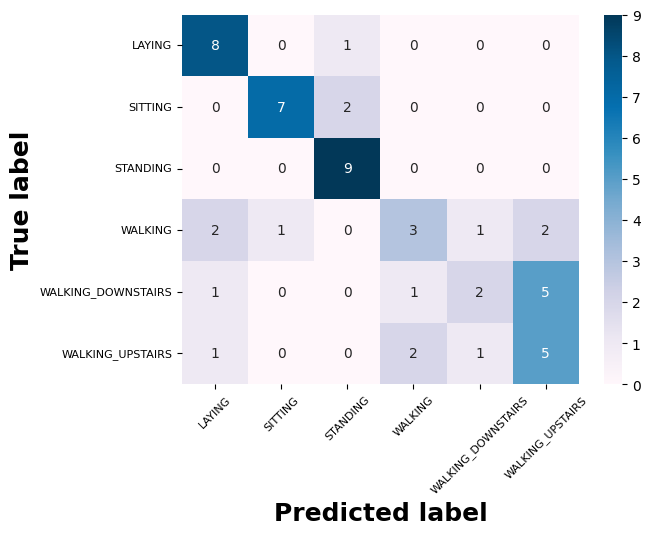

In [131]:
confMatrix(df_cm, 1)

### Q4. Varying Tree Depths $(2 - 8)$ and looking at the results for each depth

In [138]:
confusion_matrices, class_reports, class_reports_dict, accuracies = [], [], [], []
for i in range(2, 9):
    model = DecisionTreeClassifier(max_depth = i)
    clfg = model.fit(arr, df["ACTIVITY_LABEL"])
    clfg.predict(arr_test)
    
    pred, actual = model.predict(arr_test), df_test["ACTIVITY_LABEL"]
    
    cm = confusion_matrix(actual, pred)
    
    confusion_matrices.append(pd.DataFrame(cm, index = [i for i in df["ACTIVITY_LABEL"].unique()], columns = [i for i in df["ACTIVITY_LABEL"].unique()]))
    class_reports.append(classification_report(actual, pred, labels = np.unique(pred)))
    class_reports_dict.append(classification_report(actual, pred, labels = np.unique(pred), output_dict = True))
    accuracies.append(accuracy_score(actual, pred))

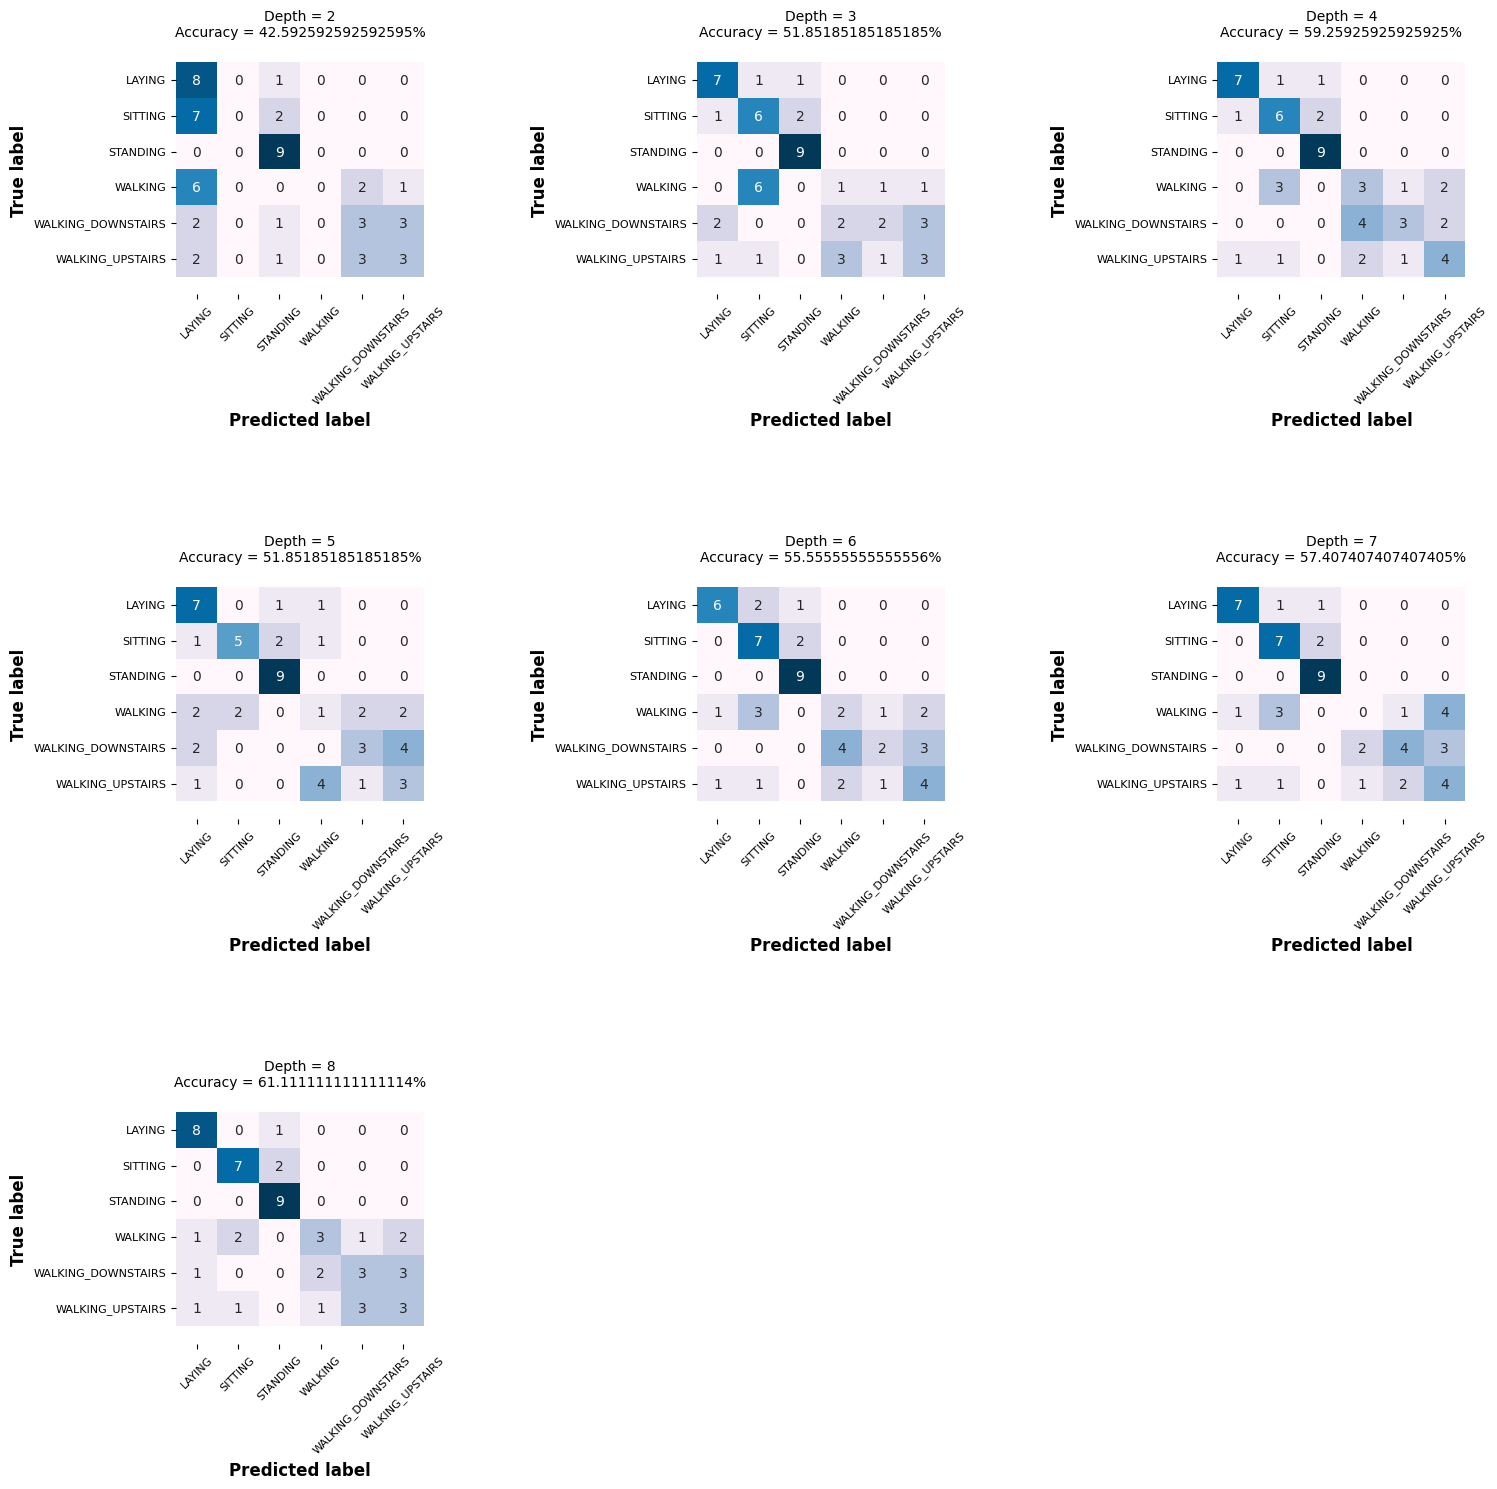

In [139]:
confMatrix(confusion_matrices, 0, accuracies = accuracies)

In [140]:
for i in class_reports:
    print(i)
    print()

                    precision    recall  f1-score   support

            LAYING       0.32      0.89      0.47         9
          STANDING       0.64      1.00      0.78         9
WALKING_DOWNSTAIRS       0.38      0.33      0.35         9
  WALKING_UPSTAIRS       0.43      0.33      0.38         9

         micro avg       0.43      0.64      0.51        36
         macro avg       0.44      0.64      0.50        36
      weighted avg       0.44      0.64      0.50        36


                    precision    recall  f1-score   support

            LAYING       0.64      0.78      0.70         9
           SITTING       0.43      0.67      0.52         9
          STANDING       0.75      1.00      0.86         9
           WALKING       0.17      0.11      0.13         9
WALKING_DOWNSTAIRS       0.50      0.22      0.31         9
  WALKING_UPSTAIRS       0.43      0.33      0.38         9

          accuracy                           0.52        54
         macro avg       0.49     